# ForestFires

Modelo Machine Learning, utilizando Redes Neurais Artificiais, para reaalização da tarefa de regressão para prever áreas (em hectares) de Incêndios Florestais, a partir de dados encontrados no [Forest Fires Dataset](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

### Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from random import randint

%matplotlib inline
%config InlineBackend.figure_format='svg'

### Dataset

In [2]:
#Importacao do dataset
dataset = pd.read_csv('forestfires.csv')

#Categorização do atributo 'month'
data_month = pd.get_dummies(dataset['month'])
dataset = pd.concat([dataset, data_month], axis=1)
#Categorização do atributo 'day'
data_day = pd.get_dummies(dataset['day'])
dataset = pd.concat([dataset, data_day], axis=1)
#Exclusao das colunas nao categorizadas 'month' e 'day'
dataset = dataset.drop(['month', 'day'], axis = 1)

#Cabeçalho dataset
dataset.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


### Análise do Dataset

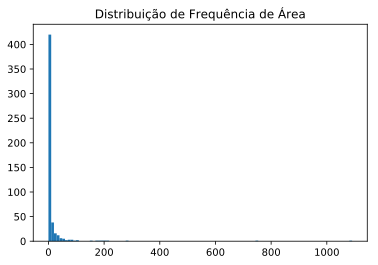

In [3]:
plt.hist(dataset.area, bins=110)
plt.title('Distribuição de Frequência de Área')
plt.show()

Podemos analisar a maior ocorrência de pequenas áreas queimadas, uma vez que o número de áreas entre 0 e 100 hectares de incêndios florestas é muito superior em relação ao restante do dataset. Assim, podemos concluir que o dataset é extremamente desbalanceado.

## Treinamento e teste para todos os dados do dataset
### Holdout 95-5

In [4]:
y = dataset['area']
x = dataset.drop(['area'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.05)

### Treinamento e Teste modelo RNA - Multilayer Perceptron

In [13]:
MLP = MLPRegressor(hidden_layer_sizes=(3,4,4,5),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 4, 5), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Resultados

#### Conjunto de Treino

MSE: 12.051063978045695


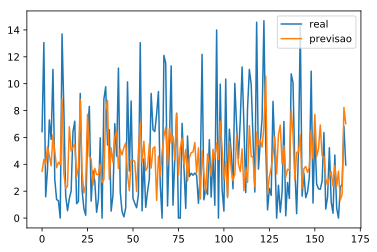

In [14]:
pred = MLP.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

#### Conjunto de Teste

MSE: 18.16288443016663


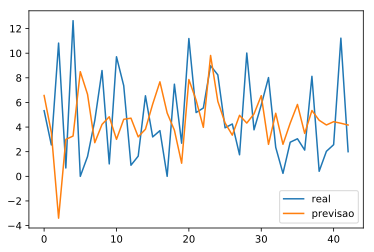

In [15]:
pred = MLP.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

## Treinamento e teste para dataset, desconsiderando outliers

Visto que o dataset é desbalanceado, vale a pena treinar o modelo um modelo para prever baixas áreas de incêndios florestais.
Para isso, serão considerado apenas instâncias do dataset cuja área seja menor ou igual à 15ha.

In [16]:
#Identificando outliers

#Excluindo instancias de áreas maiores que 15
outliers = dataset[dataset.area >15]
drop_list = []
for i in outliers.index:
    drop_list.append(i)
    
#Excluindo aleatoriamente exemplos que contenham area igual a zero 
# de tal forma que ainda restem 10 exemplos com esta área
outliers = dataset[dataset.area==0]
random_pos = []
for i in range(int(len(outliers)-10)):
    pos = randint(0, len(outliers)-1)
    while pos in random_pos:
        pos = randint(0, len(outliers)-1)
    random_pos.append(pos)
    drop_list.append(outliers.index[pos])

#Novo Dataset
new_dataset = dataset.drop(drop_list, axis = 0)

### Distribuição de áreas no novo dataset sem outliers

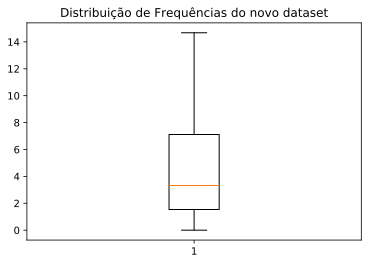

In [17]:
plt.boxplot(list(new_dataset.area))
plt.title('Distribuição de Frequências do novo dataset')
plt.show()

## Treinamento e Testes modelo RNA - Multilayer Perceptron

In [22]:
MLP1 = MLPRegressor(hidden_layer_sizes=(3,3),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')

y = new_dataset['area']
x = new_dataset.drop(['area'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

MLP1.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Resultados

#### Conjunto de Treino

MSE: 12.452319385758669


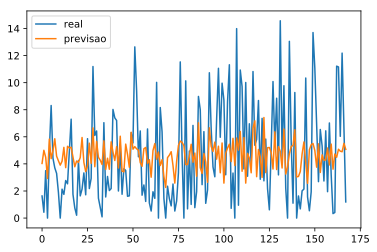

In [21]:
pred = MLP1.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

#### Conjunto de Teste

MSE: 14.256772551595871


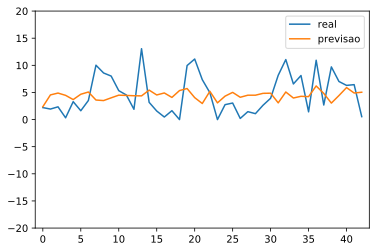

In [23]:
pred = MLP1.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.axis([-1,43,-20, 20])
plt.legend()
plt.show()